![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [130]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [131]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [132]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv('main_task.csv')
df_test = pd.read_csv('kaggle_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

city_data = pd.read_csv('Cost_of_living_index.csv')
city_population=pd.read_excel('WUP2018-F12-Cities_Over_300K.xls')


In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [134]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [135]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [136]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [137]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [138]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [139]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [141]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
9085,id_9085,Warsaw,"['Italian', 'European', 'Vegetarian Friendly',...",127.0,$$ - $$$,133.0,"[['Flavorful and exceptional', 'Excellent plac...",/Restaurant_Review-g274856-d2056931-Reviews-Re...,d2056931,0,0.0
9394,id_9394,Geneva,"['European', 'French', 'International', 'Veget...",121.0,$$$$,115.0,"[['Cold outside, warm reception and delights.....",/Restaurant_Review-g188057-d1233250-Reviews-Re...,d1233250,0,0.0
48864,id_2009,London,"['Bar', 'British', 'Pub', 'Vegetarian Friendly']",2013.0,$$ - $$$,72.0,"[['Gem of a traditional old pub', 'Guinness Bo...",/Restaurant_Review-g186338-d7694407-Reviews-Du...,d7694407,1,4.5
24562,id_858,Edinburgh,"['European', 'British', 'Scottish', 'Scandinav...",859.0,$$ - $$$,9.0,[['Excellent food and service in a unpretenti....,/Restaurant_Review-g186525-d12922920-Reviews-C...,d12922920,1,5.0
8429,id_8429,Lisbon,NaN,1890.0,NaN,8.0,"[['Fabulous Evening', 'One of the best pool cl...",/Restaurant_Review-g189158-d8769617-Reviews-Sn...,d8769617,0,0.0


In [142]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [143]:
data.isna().sum()

Restaurant_id            0
City                     0
Cuisine Style        11590
Ranking                  0
Price Range          17361
Number of Reviews     3200
Reviews                  2
URL_TA                   0
ID_TA                    0
sample                   0
Rating                   0
dtype: int64

In [144]:
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Cuisine_Style_NAN'] = pd.isna(data['Cuisine Style']).astype('uint8')
data['Price_Range_NAN'] = pd.isna(data['Price Range']).astype('uint8')

In [145]:
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Cuisine_Style_NAN,Price_Range_NAN
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,0,0,0
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,0,0,0
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,0,0,1
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,0,0,0


## Restaurant_id
Restaurant_id - 13 тысяч ресторанных ID из 50 тысяч, значит есть сетевые рестораны. Создадим новый признак chain, где 1 означает, что это сетевой ресторан

In [146]:
data.Restaurant_id.value_counts()

id_633      19
id_227      19
id_436      19
id_871      19
id_71       18
            ..
id_7217      1
id_13729     1
id_15499     1
id_12951     1
id_10970     1
Name: Restaurant_id, Length: 13094, dtype: int64

In [147]:
chain = data.Restaurant_id.value_counts()[data.Restaurant_id.value_counts() > 1].index.tolist()
data['chain'] = data[data.Restaurant_id.isin(chain)].Restaurant_id.apply(lambda x: 1)
data.chain=data['chain'].fillna(0)

In [148]:
data.chain.value_counts()

1.0    46193
0.0     3807
Name: chain, dtype: int64

## City
Теперь обработаем столбец City. Расширим данные внешней информацией о городах (база данных ООН)

Теперь обработаем столбец City. Расширим данные внешней информацией о городах (база данных ООН)

In [149]:
data.City.value_counts()

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

Исправим название города, чтобы совпадало с базами данных

In [150]:
data.City=data.City.apply(lambda x:  'Porto' if x == 'Oporto' else x)
City_list=data.City.unique().tolist()

Загрузим данные по городам, обработаем их, и объединим с основными датафрэймом

In [151]:
city_data 

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,"Hamilton, Bermuda",137.56,103.03,121.21,126.56,151.77,114.19
1,2,"Zurich, Switzerland",128.65,62.62,97.39,127.35,127.14,142.39
2,3,"Basel, Switzerland",126.89,46.14,88.66,120.44,129.10,141.48
3,4,"Lausanne, Switzerland",119.62,50.35,86.83,116.35,122.83,132.58
4,5,"Bern, Switzerland",118.42,39.22,80.93,114.54,114.86,115.48
...,...,...,...,...,...,...,...,...
531,532,"Vadodara, India",22.28,3.78,13.52,22.26,14.43,74.59
532,533,"Kochi, India",21.73,5.45,14.02,21.93,12.20,73.42
533,534,"Visakhapatnam, India",21.52,4.26,13.35,21.09,17.09,55.47
534,535,"Navi Mumbai, India",19.30,4.70,12.39,19.21,12.55,138.06


In [152]:
city_data[['City','Country']]=city_data.City.str.split(pat=',',n=1,expand=True)
city_data.City=city_data.City.apply(lambda x: 'Krakow' if x == 'Krakow (Cracow)' else x)
City_data_list=city_data.City.unique().tolist()

In [153]:
for city in City_list:
    if city not in City_data_list:
        print(city)

In [154]:
city_data=city_data[(city_data.City.isin(City_list)) & (city_data.Country!=' Canada')]
city_data

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country
1,2,Zurich,128.65,62.62,97.39,127.35,127.14,142.39,Switzerland
5,6,Geneva,118.33,69.16,95.06,112.08,119.78,133.47,Switzerland
9,10,Oslo,107.14,48.58,79.42,93.81,114.42,104.30,Norway
19,20,Copenhagen,87.91,47.84,68.94,64.59,113.18,114.05,Denmark
21,22,Luxembourg,86.85,61.31,74.76,70.75,99.49,120.25,Luxembourg
25,26,Paris,84.68,47.60,67.13,73.77,88.11,95.38,France
30,31,Amsterdam,82.14,54.65,69.13,62.35,87.71,98.88,Netherlands
33,34,London,81.31,70.30,76.10,57.74,91.85,100.22,United Kingdom
35,36,Helsinki,80.60,35.69,59.34,61.31,94.99,108.83,Finland
38,39,Dublin,80.28,60.12,70.73,60.82,87.98,89.32,Ireland


In [155]:
data = data.join(city_data.set_index('City'), on='City')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Restaurant_id                   50000 non-null  object 
 1   City                            50000 non-null  object 
 2   Cuisine Style                   38410 non-null  object 
 3   Ranking                         50000 non-null  float64
 4   Price Range                     32639 non-null  object 
 5   Number of Reviews               46800 non-null  float64
 6   Reviews                         49998 non-null  object 
 7   URL_TA                          50000 non-null  object 
 8   ID_TA                           50000 non-null  object 
 9   sample                          50000 non-null  int64  
 10  Rating                          50000 non-null  float64
 11  Number_of_Reviews_isNAN         50000 non-null  uint8  
 12  Cuisine_Style_NAN               

В рассмотренном датасете нет данных по населению, поэтому придется поработать с еще одной базой данных. Здесь придется обработать множество названий, чтобы они совпадали с нашей базой данных. 

In [156]:
city_population

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Country or area,Urban Agglomeration,Latitude,Longitude,2015.000,2020.000
1,Austria,Wien (Vienna),48.2064,16.3707,1834.982,1929.944
2,Azerbaijan,Baku,40.3777,49.892,2206.320,2341.443
3,Azerbaijan,Gäncä,40.6828,46.3606,327.548,340.912
4,Azerbaijan,Sumquayit,40.5897,49.6686,332.764,354.086
...,...,...,...,...,...,...
1210,Zambia,Lusaka,-15.4134,28.2771,2187.180,2774.133
1211,Zambia,Ndola,-12.9587,28.6366,492.519,542.495
1212,Zimbabwe,Bulawayo,-20.15,28.5833,646.800,638.188
1213,Zimbabwe,Chitungwiza,-18.0127,31.0755,367.101,386.452


In [157]:
city_population.columns=['Country_pop', 'City','Latitude','Longitude','2015','2020']
city_population=city_population.drop([0])
city_population.City=city_population.City.apply(lambda x: 'Vienna' if x == 'Wien (Vienna)' else x)
city_population.City=city_population.City.apply(lambda x: 'Rome' if x == 'Roma (Rome)' else x)
city_population.City=city_population.City.apply(lambda x: 'Krakow' if x == 'Kraków (Cracow)' else x)
city_population.City=city_population.City.apply(lambda x: 'Milan' if x == 'Milano (Milan)' else x)
city_population.City=city_population.City.apply(lambda x: 'Munich' if x == 'München (Munich)' else x)
city_population.City=city_population.City.apply(lambda x: 'Athens' if x == 'Athínai (Athens)' else x)
city_population.City=city_population.City.apply(lambda x: 'Copenhagen' if x == 'København (Copenhagen)' else x)
city_population.City=city_population.City.apply(lambda x: 'Brussels' if x == 'Bruxelles-Brussel' else x)
city_population.City=city_population.City.apply(lambda x: 'Geneva' if x == 'Genève' else x)
city_population.City=city_population.City.apply(lambda x: 'Lisbon' if x == 'Lisboa (Lisbon)' else x)
city_population.City=city_population.City.apply(lambda x: 'Prague' if x == 'Praha (Prague)' else x)
city_population.City=city_population.City.apply(lambda x: 'Zurich' if x ==  'Zürich (Zurich)' else x)
city_population.City=city_population.City.apply(lambda x: 'Warsaw' if x == 'Warszawa (Warsaw)' else x)

pop_list=city_population.City.unique().tolist()
for city in City_list:
    if city not in pop_list:
        print(city)

Luxembourg
Ljubljana


Нет данных по Люксембургу и Любляне. Позже добавим их вручную

In [158]:
pop=city_population[(city_population.City.isin(City_list))]
data = data.join(pop.set_index('City'), on='City')

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Restaurant_id                   50000 non-null  object 
 1   City                            50000 non-null  object 
 2   Cuisine Style                   38410 non-null  object 
 3   Ranking                         50000 non-null  float64
 4   Price Range                     32639 non-null  object 
 5   Number of Reviews               46800 non-null  float64
 6   Reviews                         49998 non-null  object 
 7   URL_TA                          50000 non-null  object 
 8   ID_TA                           50000 non-null  object 
 9   sample                          50000 non-null  int64  
 10  Rating                          50000 non-null  float64
 11  Number_of_Reviews_isNAN         50000 non-null  uint8  
 12  Cuisine_Style_NAN               

Вручную заполним данные по двум оставшимся городам

In [160]:
data['2015'] = data[['City','2015']].apply(lambda x : 513 if x[0] == 'Luxembourg' else x[1], axis=1)
data['2015'] = data[['City','2015']].apply(lambda x : 278 if x[0] == 'Ljubljana' else x[1], axis=1)
data['2020'] = data[['City','2020']].apply(lambda x : 295 if x[0] == 'Ljubljana' else x[1], axis=1)
data['2020'] = data[['City','2020']].apply(lambda x : 614 if x[0] == 'Luxembourg' else x[1], axis=1)

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Restaurant_id                   50000 non-null  object 
 1   City                            50000 non-null  object 
 2   Cuisine Style                   38410 non-null  object 
 3   Ranking                         50000 non-null  float64
 4   Price Range                     32639 non-null  object 
 5   Number of Reviews               46800 non-null  float64
 6   Reviews                         49998 non-null  object 
 7   URL_TA                          50000 non-null  object 
 8   ID_TA                           50000 non-null  object 
 9   sample                          50000 non-null  int64  
 10  Rating                          50000 non-null  float64
 11  Number_of_Reviews_isNAN         50000 non-null  uint8  
 12  Cuisine_Style_NAN               

In [162]:
data=data.drop(['Country_pop', 'Latitude', 'Longitude'],axis=1)
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country,2015,2020
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,26,84.68,47.60,67.13,73.77,88.11,95.38,France,10733.502,11017.230
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,36,80.60,35.69,59.34,61.31,94.99,108.83,Finland,1222.294,1304.851
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,138,70.73,33.44,53.08,58.75,80.86,110.16,United Kingdom,506.575,536.775
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,34,81.31,70.30,76.10,57.74,91.85,100.22,United Kingdom,8661.381,9304.016
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,337,48.64,22.28,36.16,39.84,42.14,71.93,Slovakia,421.937,434.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,95,73.89,39.56,57.63,59.19,84.57,74.87,Italy,3103.354,3140.181
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,26,84.68,47.60,67.13,73.77,88.11,95.38,France,10733.502,11017.230
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,55,77.23,40.18,59.69,64.74,85.51,115.83,Sweden,1495.198,1632.798
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,376,42.32,20.60,32.04,31.63,39.89,76.34,Poland,1740.175,1783.251


Добавим новый признак - на сколько выросло население за 5 лет: city_growth_rate

In [163]:
data['city_growth_rate']=data['2020']/data['2015']
data['city_growth_rate'].value_counts()

1.074195    7193
1.026434    6108
1.063661    3813
1.058488    3395
1.013787    2705
1.011867    2694
1.034978    2589
1.028554    1816
1.025498    1647
1.051751    1443
1.038801    1372
1.039126    1314
1.002044    1186
1.068370    1145
1.044110    1126
1.092028    1033
1.012704    1021
1.024754     925
1.056205     836
1.059501     819
0.997533     776
1.059616     745
1.051491     685
1.010895     642
1.066278     590
1.006909     554
1.075194     488
1.067543     475
1.030784     380
1.196881     263
1.061151     222
Name: city_growth_rate, dtype: int64

In [164]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Country,2015,2020,city_growth_rate
37052,id_5574,Milan,"['Italian', 'International']",5577.0,$,38.0,"[['No true passion for food', 'Apperitivo was ...",/Restaurant_Review-g187849-d3932662-Reviews-Do...,d3932662,1,...,73.89,39.56,57.63,59.19,84.57,74.87,Italy,3103.354,3140.181,1.011867
46319,id_56,Krakow,"['Polish', 'European', 'Eastern European', 'Ce...",57.0,$$ - $$$,2197.0,"[['Tasting Polish food', 'Excellent Saturday d...",/Restaurant_Review-g274772-d779867-Reviews-Mio...,d779867,1,...,39.53,17.33,29.02,29.92,33.78,70.68,Poland,763.456,768.731,1.006909
24785,id_1701,Paris,['Vegetarian Friendly'],1702.0,$$ - $$$,35.0,"[['The place to be', 'Absolutely!!'], ['10/29/...",/Restaurant_Review-g187147-d12007962-Reviews-L...,d12007962,1,...,84.68,47.60,67.13,73.77,88.11,95.38,France,10733.502,11017.230,1.026434
36405,id_6202,Madrid,"['Pub', 'Gastropub']",6205.0,NaN,6.0,"[[], []]",/Restaurant_Review-g187514-d7624962-Reviews-Ne...,d7624962,1,...,60.12,31.59,46.62,45.69,64.44,91.36,Spain,6221.450,6617.513,1.063661
15933,id_10583,Paris,"['Japanese', 'Sushi']",10585.0,$,21.0,"[['Canned tuna fish', 'Long grain rice for Jap...",/Restaurant_Review-g187147-d7218096-Reviews-Ok...,d7218096,1,...,84.68,47.60,67.13,73.77,88.11,95.38,France,10733.502,11017.230,1.026434


## Price Range

In [36]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  Их можно поставить по возрастанию
Пропущенные данные заполним медианой - средними ресторанами 

In [165]:
def price_range(x):
    if x == '$':
        return 1
    elif x == "$$ - $$$":
        return 2
    elif x == '$$$$':
        return 3
    else: 
        return 2
    
data['Price Range']=data['Price Range'].apply(price_range)

In [166]:
data['Price Range'].value_counts()

2    40402
1     7816
3     1782
Name: Price Range, dtype: int64

## Cuisine Style

Заполним неизвестные как Unknown. Создадим новый признак количества кухнь в ресторане 



Заполним неизвестные как Unknown. Создадим новый признак количества кухнь в ресторане 


In [167]:
data['Cuisine Style'].fillna("['Unknown']", inplace=True)
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: eval(x))
df1=data.explode('Cuisine Style')
Cuisine_List=df1['Cuisine Style'].unique().tolist()



Посчитаем количество кухонь, доступных в ресторане

In [168]:
data['Number_Of_Cuisine']=data['Cuisine Style'].apply(lambda x:len(x))
data['Number_Of_Cuisine'].value_counts()

1     20744
2      7794
3      6638
4      5948
5      4482
6      2611
7      1294
8       363
9        93
10       26
11        4
21        1
15        1
13        1
Name: Number_Of_Cuisine, dtype: int64

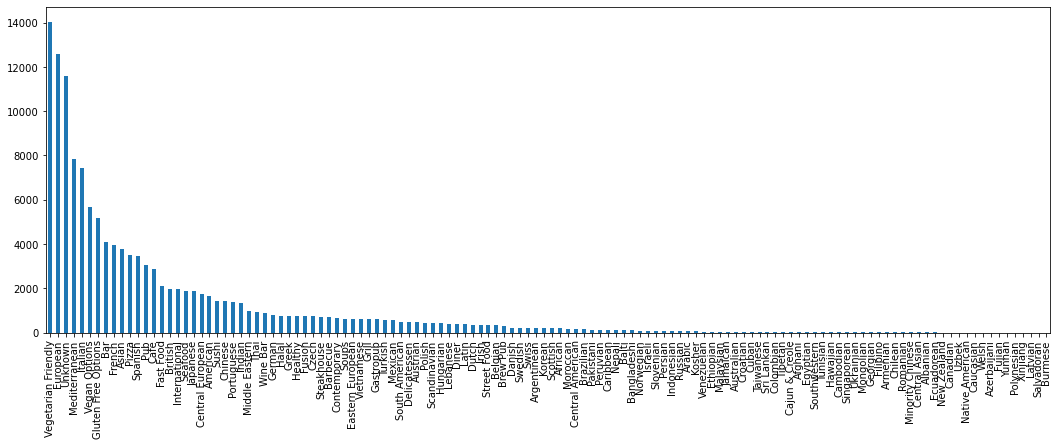

In [169]:
plt.figure(figsize=(18,6))
df1['Cuisine Style'].value_counts(ascending=False).plot(kind='bar');

Мы видим, что есть очень популярная кухня и очень редкая. Для редкой создадим отдельный столбик, где посчитает количество редких кухонь в ресторане. А популярную кухню превратим в dummy переменные 

In [170]:
df1['Cuisine Style'].value_counts()<100
Exotic_Cuisine_List = list(df1['Cuisine Style'].value_counts()[df1['Cuisine Style'].value_counts() < 100].index)

def exotic_cuisine(row):
    number=0
    for x in Exotic_Cuisine_List:
        if x in row:
            number+=1
    return number

data['Exotic_Cuisine']=data['Cuisine Style'].apply(exotic_cuisine)
data['Exotic_Cuisine'].value_counts()

0    48728
1     1163
2      100
3        8
4        1
Name: Exotic_Cuisine, dtype: int64

In [171]:
df1['Cuisine Style'].value_counts()>1000

Vegetarian Friendly     True
European                True
Unknown                 True
Mediterranean           True
Italian                 True
                       ...  
Polynesian             False
Xinjiang               False
Latvian                False
Salvadoran             False
Burmese                False
Name: Cuisine Style, Length: 126, dtype: bool

In [172]:
df1['Cuisine Style'].value_counts()>1000
Pop_Cuisine_List = list(df1['Cuisine Style'].value_counts()[df1['Cuisine Style'].value_counts() > 1000].index)

def find_item(cell):
    if item in cell:
        return 1
    return 0 

for item in Pop_Cuisine_List:
    data[item]=data['Cuisine Style'].apply(find_item)
    
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,British,International,Seafood,Japanese,Central European,American,Sushi,Chinese,Portuguese,Indian
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,0,0,0,0,0,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,0,0,0,0,0,0,0,0
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,0,0,0,0,1,0,0,0,0
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,2,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,0,0,0,1,0,0,1,0,0,0
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,0,0,0,0,1,0,0,0,0,0


## Reviews

Следующий признак - Reviews. Его нужно почистить. Он состоит из двух отзывов и двух дат. Если это два последних отзыва, а не рандомных, то можно посмотреть разницу во времени между двумя последними отзывами. Чтобы это проверить есть показатель количество отзывов.И там, где есть только одна дата не стоит один отзыв. Так что непонятно, почему у некоторых ресторанов всего один отзыв. 

Следующий признак - Reviews. Его нужно почистить. Он состоит из двух отзывов и двух дат. Если это два последних отзыва, а не рандомных, то можно посмотреть разницу во времени между двумя последними отзывами. Чтобы это проверить есть показатель количество отзывов.И там, где есть только одна дата не стоит один отзыв. Так что непонятно, почему у некоторых ресторанов всего один отзыв. 

In [173]:
data.Reviews=data.Reviews.fillna('no')
def func(x):
    x = x.replace('[[','').replace('[','').replace(']]','').replace("'",'')
    return x
data.Reviews = data.Reviews.apply(func)

data[['Reviews','Time']] = data.Reviews.str.split(pat='],',n=1,expand=True)
data.Time = data.Time.str.replace(' ','')
data[['Time','Time2']] = data.Time.str.split(',',n=1,expand=True)
data['Time'] = pd.to_datetime(data['Time'],format='%m/%d/%Y',errors='coerce')
data['Time2'] = pd.to_datetime(data['Time2'],format='%m/%d/%Y',errors='coerce')
data['TimeDelta'] = data['Time']-data['Time2']

def time_delta(x):
    return x.total_seconds()
data['Time_delta']=data.TimeDelta.apply(time_delta)
    
data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Central European,American,Sushi,Chinese,Portuguese,Indian,Time,Time2,TimeDelta,Time_delta
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,0,0,0,NaT,NaT,NaT,NaN
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"Very good reviews!, Fine dining in Hakaniemi",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,2017-12-05,2017-10-29,37 days,3196800.0
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2,28.0,"Better than the Links, Ivy Black",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,2017-12-28,2017-12-06,22 days,1900800.0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3,202.0,"Most exquisite, Delicious and authentic",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,2017-12-06,2017-11-22,14 days,1209600.0
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3,162.0,"Always the best in bratislava, Very good but p...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,2018-02-08,2018-01-24,15 days,1296000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"[Italian, Vegetarian Friendly, Vegan Options, ...",500.0,2,79.0,"The real Italian experience!, Wonderful food, ...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,...,0,0,0,0,0,0,2017-12-16,2017-11-12,34 days,2937600.0
49996,id_6340,Paris,"[French, American, Bar, European, Vegetarian F...",6341.0,2,542.0,"Parisian atmosphere, Bit pricey but interestin...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,...,0,1,0,0,0,0,2017-12-21,2017-12-12,9 days,777600.0
49997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,2,4.0,"Good by swedish standards, A hidden jewel in t...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,...,0,0,1,0,0,0,2016-11-03,2008-04-12,3127 days,270172800.0
49998,id_640,Warsaw,"[Polish, European, Eastern European, Central E...",641.0,2,70.0,"Underground restaurant, Oldest Restaurant in W...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,...,1,0,0,0,0,0,2017-07-11,2017-06-18,23 days,1987200.0


Обрабатывать текст я пока не умею и парсить данные тоже, поэтому столбцы Reviews, URL_TA	 и ID_TA можно удалить. 

In [174]:
data=data.drop(['Restaurant_id','Cuisine Style','Reviews','URL_TA','ID_TA','Time','Time2','TimeDelta', '2015'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City                            50000 non-null  object 
 1   Ranking                         50000 non-null  float64
 2   Price Range                     50000 non-null  int64  
 3   Number of Reviews               46800 non-null  float64
 4   sample                          50000 non-null  int64  
 5   Rating                          50000 non-null  float64
 6   Number_of_Reviews_isNAN         50000 non-null  uint8  
 7   Cuisine_Style_NAN               50000 non-null  uint8  
 8   Price_Range_NAN                 50000 non-null  uint8  
 9   chain                           50000 non-null  float64
 10  Rank                            50000 non-null  int64  
 11  Cost of Living Index            50000 non-null  float64
 12  Rent Index                      

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

<AxesSubplot:>

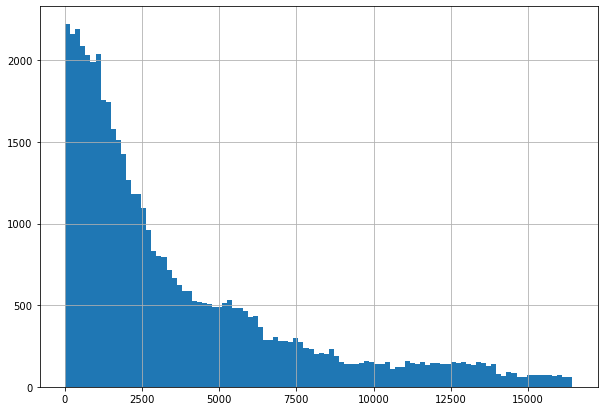

In [175]:
plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

<AxesSubplot:>

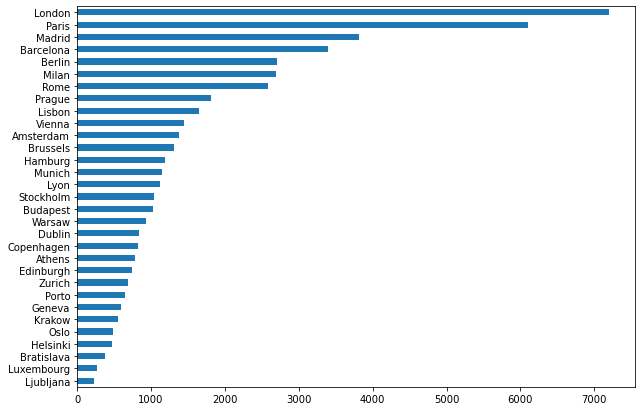

In [176]:
plt.figure(facecolor='white')
data['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

<AxesSubplot:>

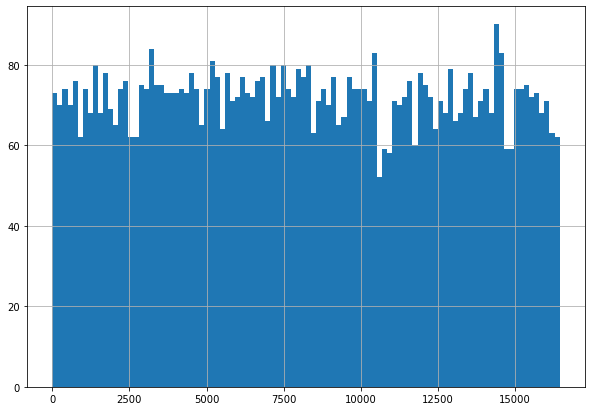

In [177]:
data['Ranking'][data['City'] =='London'].hist(bins=100)

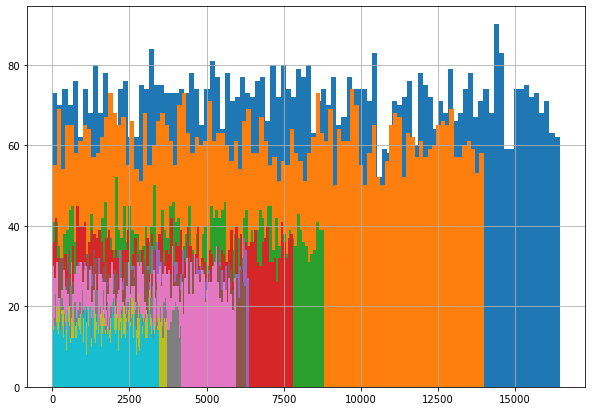

In [178]:
# посмотрим на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

Нормализуем признак, разделив рейтинг в на количество ресторанов в городе 


In [179]:
number_of_cities_dict = dict(data['City'].value_counts())
data['number_of_restaurants'] = data.City.map(number_of_cities_dict)
data['Ranking_norm']=data['Ranking']/data['number_of_restaurants']


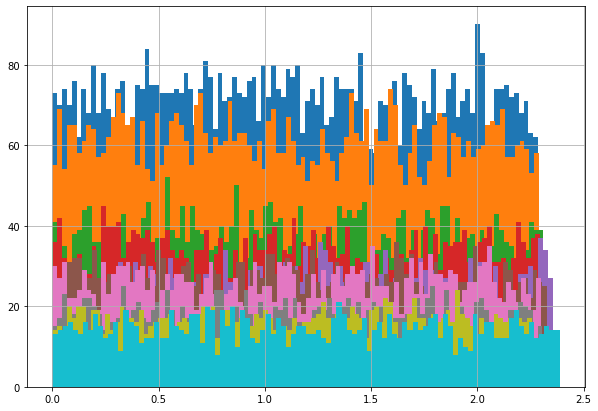

In [180]:
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking_norm'][data['City'] == x].hist(bins=100)
plt.show()

Посмотрим, как коррелируют новые признаки

<AxesSubplot:>

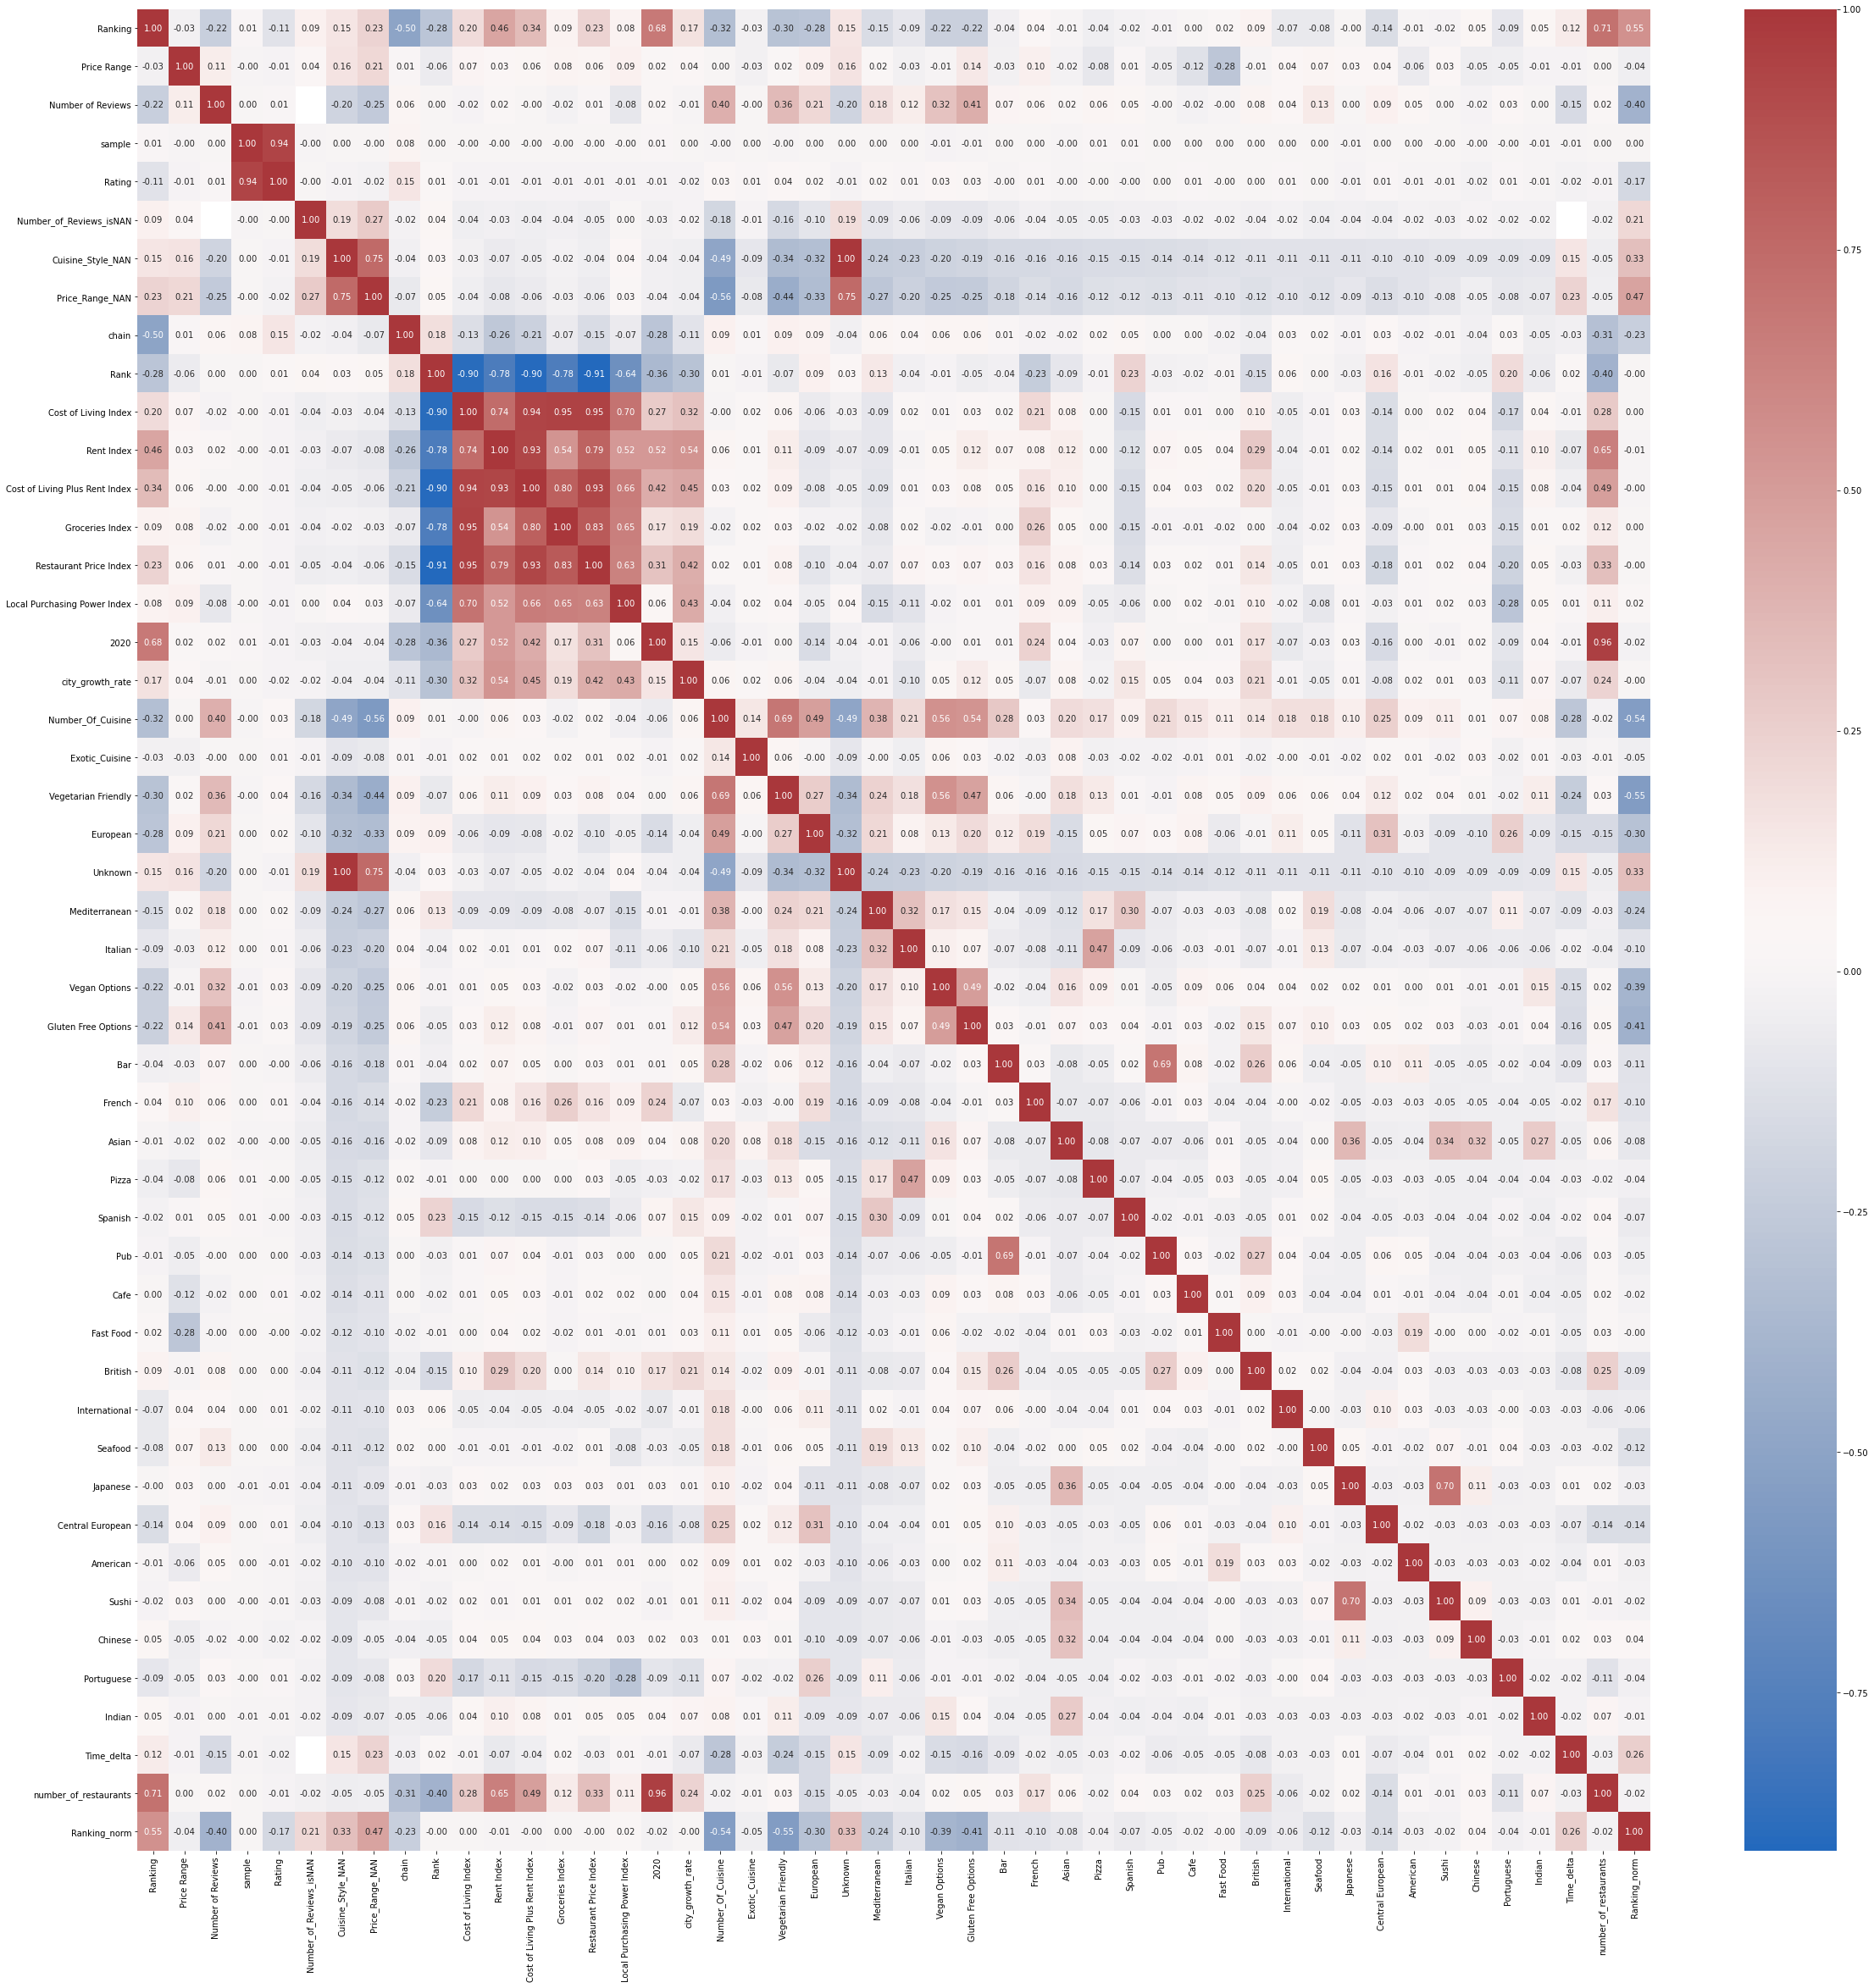

In [181]:
plt.figure(figsize=(40,40),facecolor='white')
sns.heatmap(data.corr(),annot=True, cmap='vlag',fmt='.2f')

Отлчино коррелируют лучше чем оригинальные признаки!

### Посмотрим распределение целевой переменной

<AxesSubplot:>

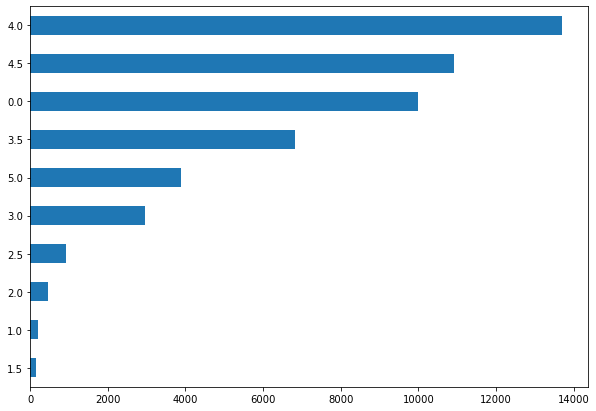

In [182]:
plt.figure(facecolor='white')
data['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

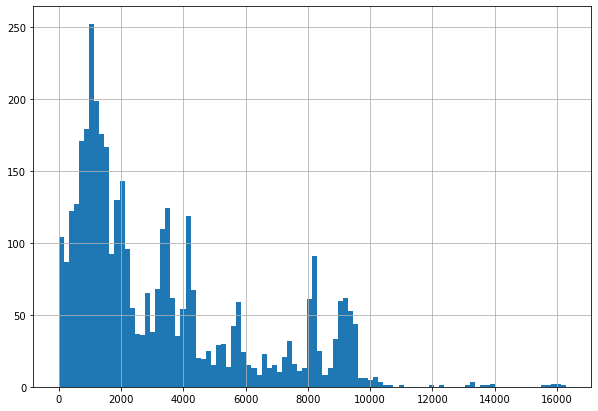

In [183]:
data['Ranking'][data['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

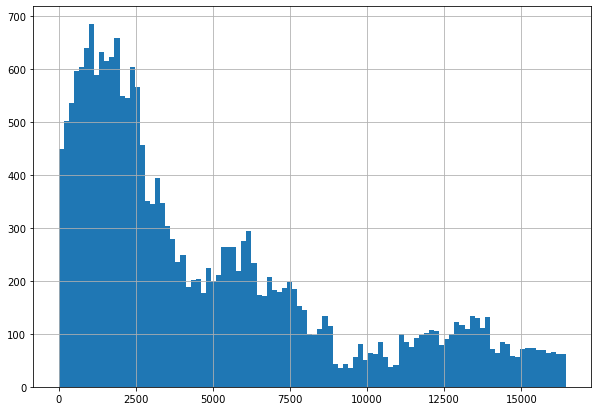

In [184]:
data['Ranking'][data['Rating'] < 4].hist(bins=100)

<AxesSubplot:xlabel='Price Range', ylabel='Rating'>

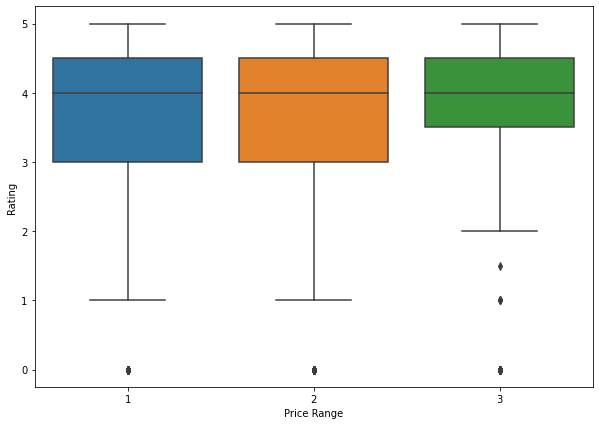

In [75]:
sns.boxplot(x='Price Range', y='Rating', data=data)

<AxesSubplot:xlabel='City'>

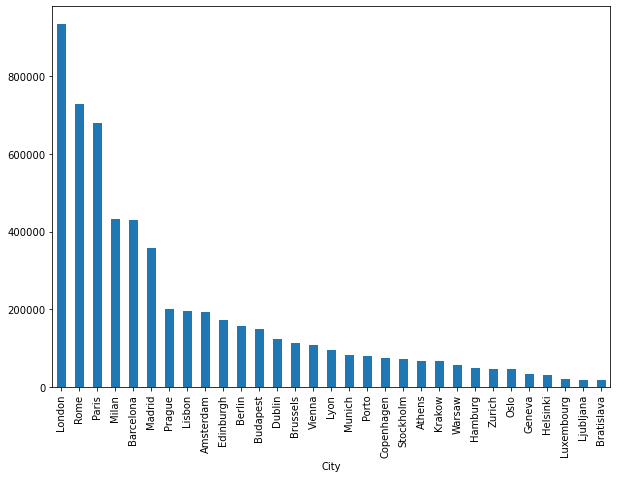

In [78]:
plt.figure(facecolor='white')
data.groupby('City')['Number of Reviews'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='2020'>

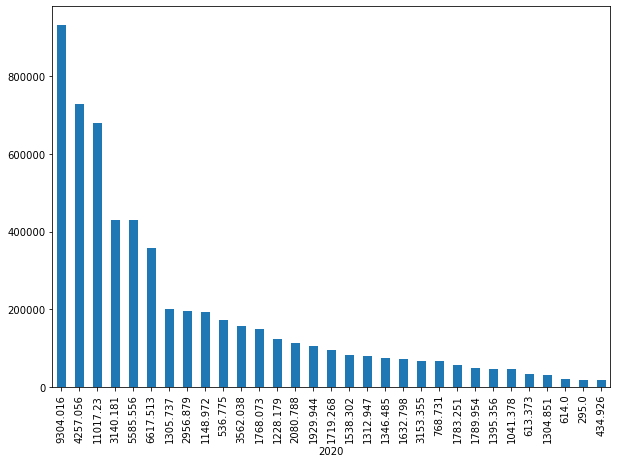

In [79]:
plt.figure(facecolor='white')
data.groupby('2020')['Number of Reviews'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='2020'>

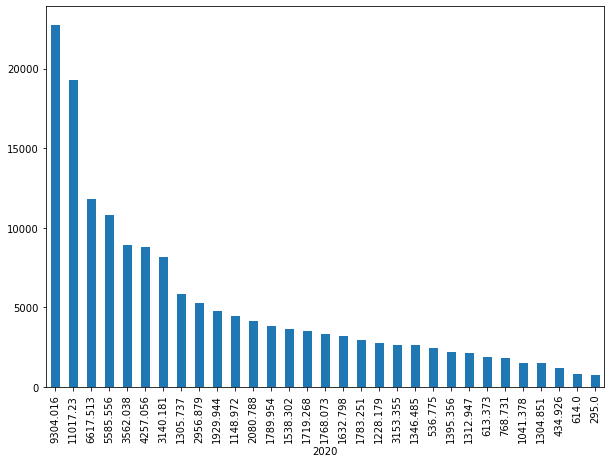

In [80]:
plt.figure(facecolor='white')
data.groupby('2020')['Rating'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='2020'>

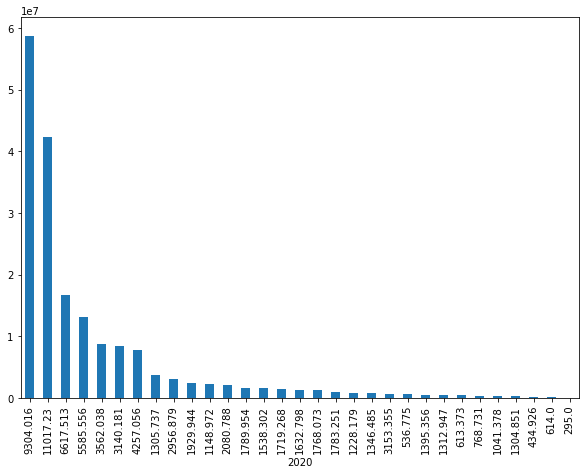

In [81]:
plt.figure(facecolor='white')
data.groupby('2020')['Ranking'].sum().sort_values(ascending=False).plot(kind='bar')

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

<AxesSubplot:>

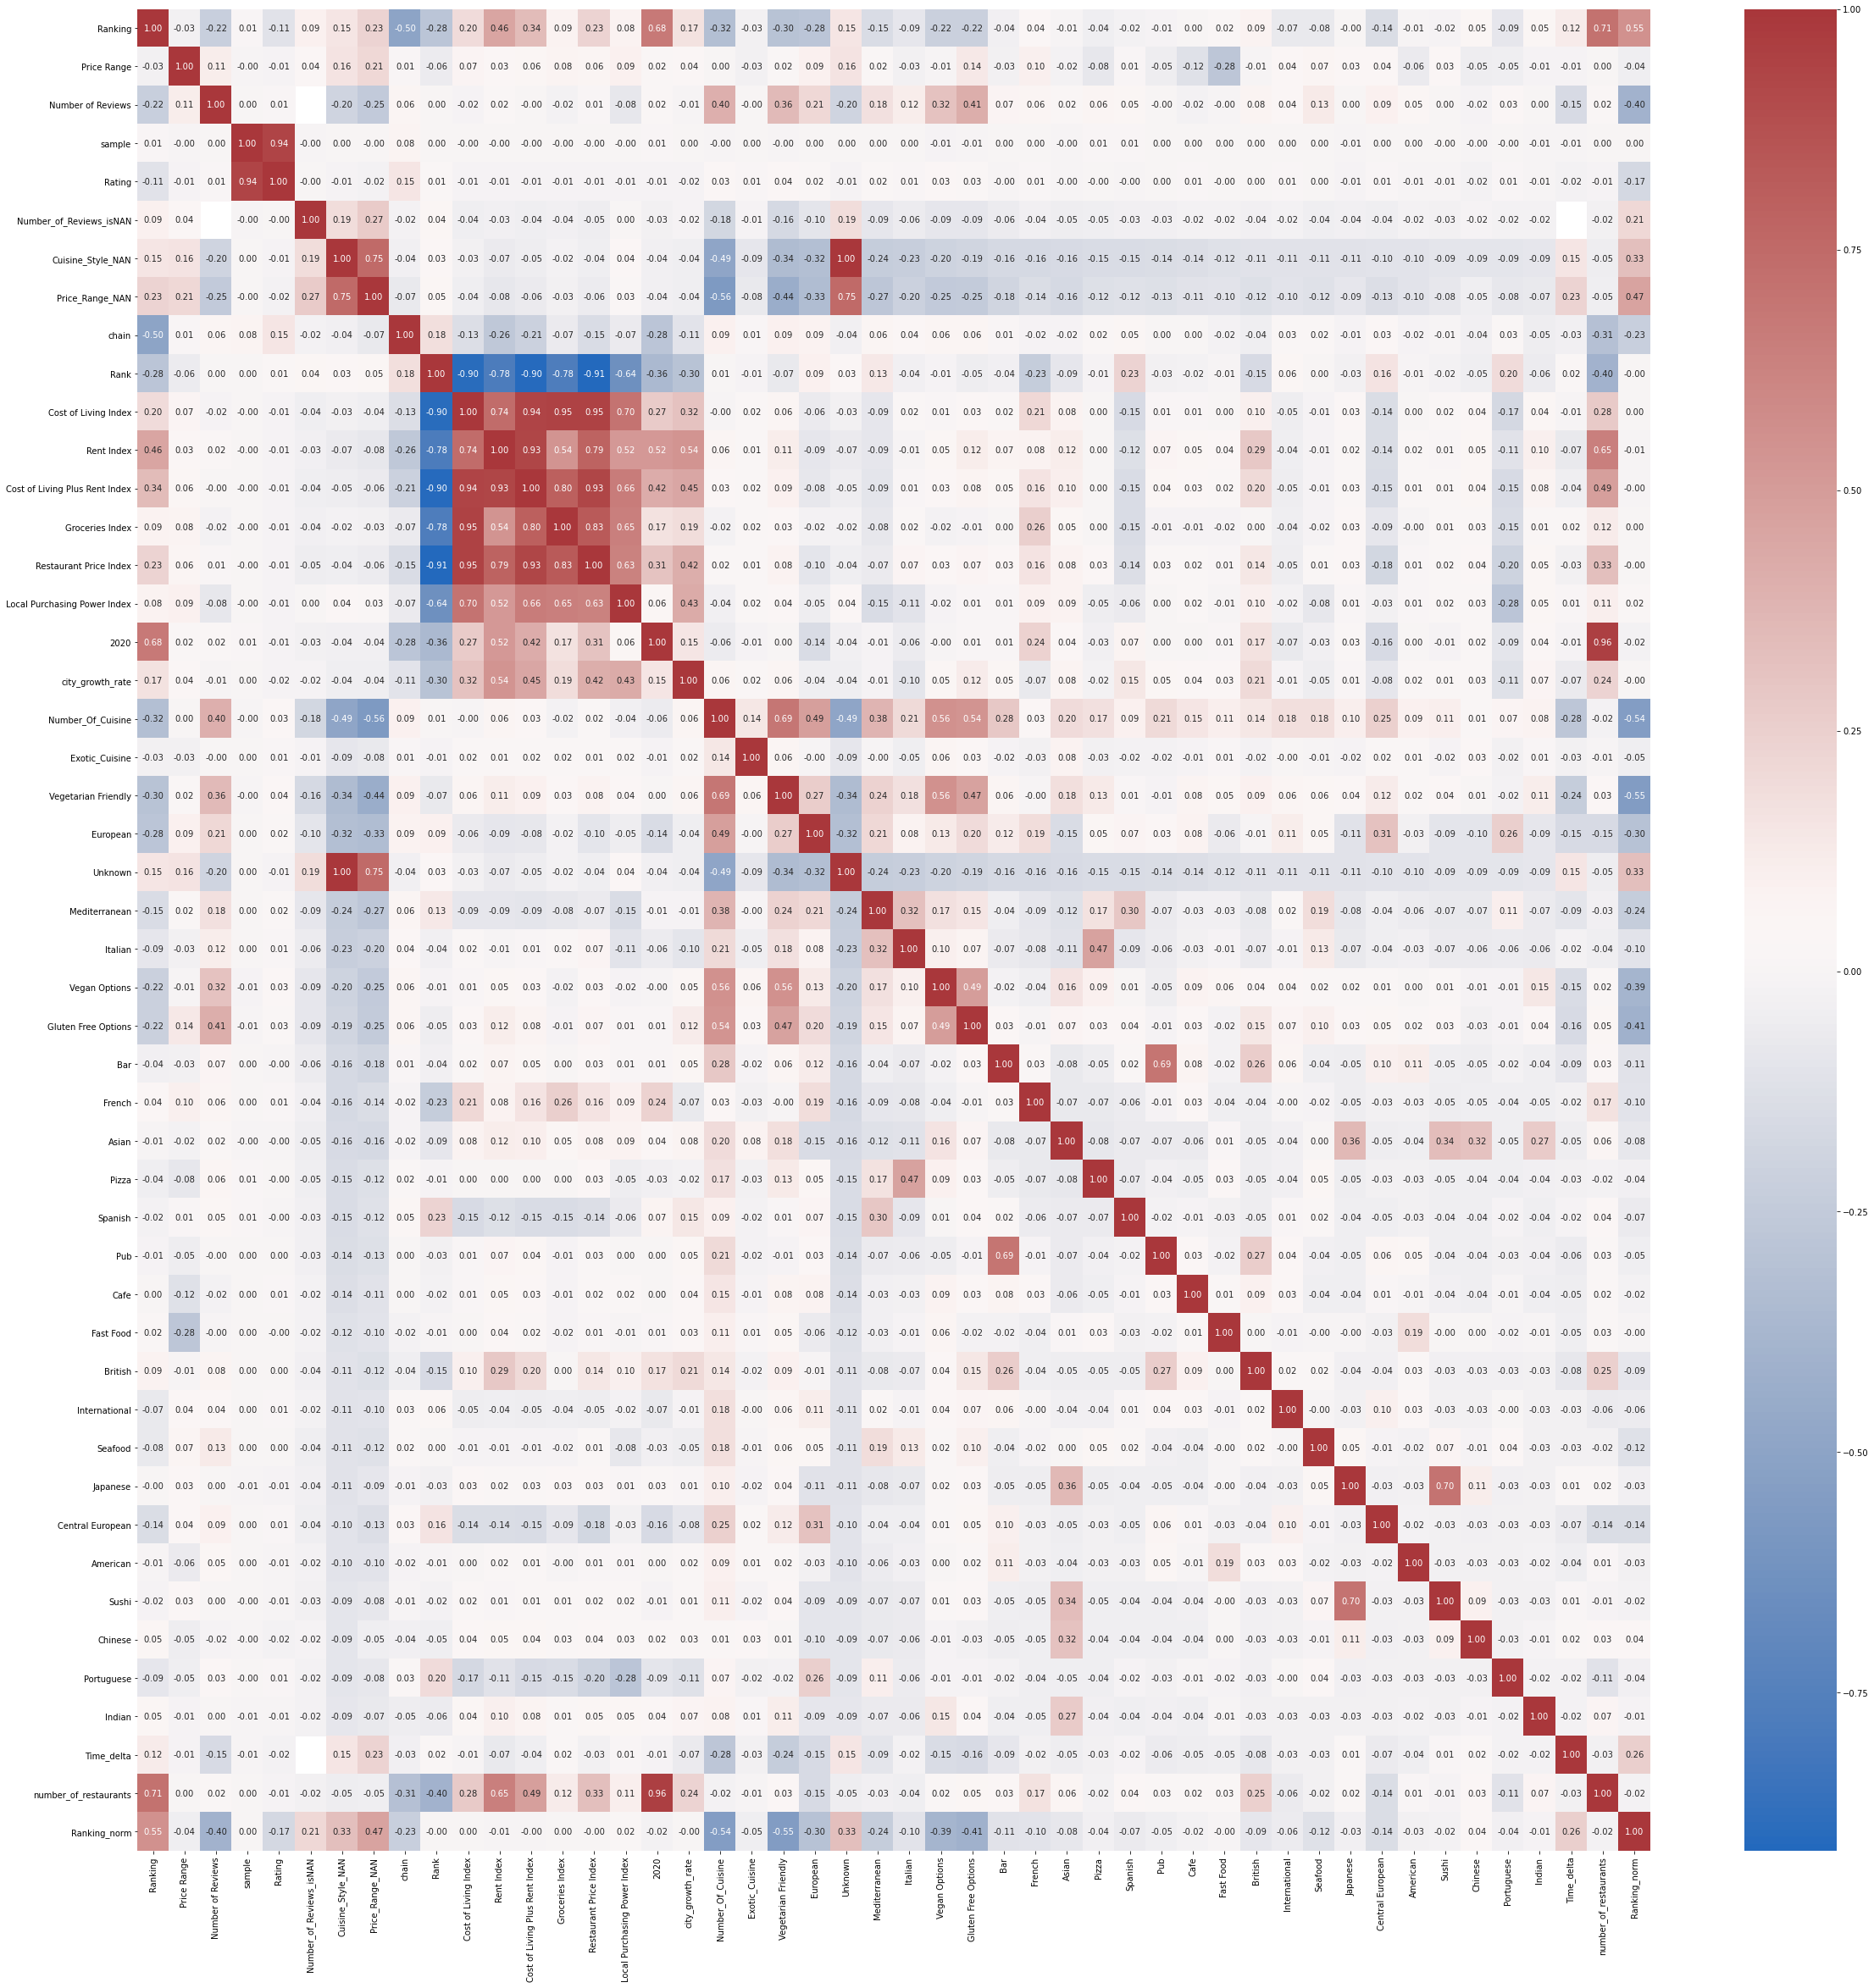

In [95]:
plt.figure(figsize=(40,40),facecolor='white')
sns.heatmap(data.corr(),annot=True, cmap='vlag',fmt='.2f')

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

#### Запускаем и проверяем что получилось

In [96]:
data.sample(10)

,City,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Cuisine_Style_NAN,Price_Range_NAN,chain,...,Japanese,Central European,American,Sushi,Chinese,Portuguese,Indian,Time_delta,number_of_restaurants,Ranking_norm
41205,London,5842.0,2,9.0,1,4.5,0,1,1,1.0,...,0,0,0,0,0,0,0,0.0,7193,0.812179
45669,Rome,5353.0,1,28.0,1,4.0,0,0,0,1.0,...,0,0,0,0,0,0,0,9244800.0,2589,2.067594
42523,Lyon,202.0,2,88.0,1,4.5,0,0,0,1.0,...,0,0,0,0,0,0,0,1814400.0,1126,0.179396
34517,Madrid,8519.0,2,NaN,1,2.0,1,0,1,1.0,...,0,0,0,0,0,0,0,NaN,3813,2.234199
18952,Paris,5251.0,1,46.0,1,4.5,0,0,0,1.0,...,0,0,0,0,0,0,0,13305600.0,6108,0.859692
25715,Krakow,105.0,2,213.0,1,4.5,0,0,0,1.0,...,0,0,0,0,0,0,0,3456000.0,554,0.189531
38843,London,15267.0,2,3.0,1,3.0,0,1,1,0.0,...,0,0,0,0,0,0,0,86400.0,7193,2.122480
46297,Helsinki,577.0,2,3.0,1,5.0,0,0,1,1.0,...,0,0,0,0,0,0,0,79660800.0,475,1.214737
27712,Barcelona,1463.0,2,109.0,1,4.5,0,0,0,1.0,...,0,0,0,0,0,0,0,3974400.0,3395,0.430928
42504,Budapest,231.0,1,346.0,1,4.0,0,0,0,1.0,...,0,1,0,0,0,0,0,5529600.0,1021,0.226249


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City                            50000 non-null  object 
 1   Ranking                         50000 non-null  float64
 2   Price Range                     50000 non-null  int64  
 3   Number of Reviews               46800 non-null  float64
 4   sample                          50000 non-null  int64  
 5   Rating                          50000 non-null  float64
 6   Number_of_Reviews_isNAN         50000 non-null  uint8  
 7   Cuisine_Style_NAN               50000 non-null  uint8  
 8   Price_Range_NAN                 50000 non-null  uint8  
 9   chain                           50000 non-null  float64
 10  Rank                            50000 non-null  int64  
 11  Cost of Living Index            50000 non-null  float64
 12  Rent Index                      

In [185]:
data=data.fillna(0)
data = pd.get_dummies(data, columns=['City'])

data

,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Cuisine_Style_NAN,Price_Range_NAN,chain,Rank,...,City_Munich,City_Oslo,City_Paris,City_Porto,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
0,12963.0,2,4.0,0,0.0,0,0,0,1.0,26,...,0,0,1,0,0,0,0,0,0,0
1,106.0,2,97.0,0,0.0,0,0,0,1.0,36,...,0,0,0,0,0,0,0,0,0,0
2,810.0,2,28.0,0,0.0,0,0,0,1.0,138,...,0,0,0,0,0,0,0,0,0,0
3,1669.0,3,202.0,0,0.0,0,0,0,1.0,34,...,0,0,0,0,0,0,0,0,0,0
4,37.0,3,162.0,0,0.0,0,0,0,1.0,337,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,500.0,2,79.0,1,4.5,0,0,0,1.0,95,...,0,0,0,0,0,0,0,0,0,0
49996,6341.0,2,542.0,1,3.5,0,0,0,1.0,26,...,0,0,1,0,0,0,0,0,0,0
49997,1652.0,2,4.0,1,4.5,0,0,1,1.0,55,...,0,0,0,0,0,0,1,0,0,0
49998,641.0,2,70.0,1,4.0,0,0,0,1.0,376,...,0,0,0,0,0,0,0,0,1,0


In [186]:
data=data.drop(['Country',
       'Cost of Living Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index'],axis=1)

In [126]:
data.columns

Index(['Ranking', 'Price Range', 'Number of Reviews', 'sample', 'Rating',
       'Number_of_Reviews_isNAN', 'Cuisine_Style_NAN', 'Price_Range_NAN',
       'chain', 'Rank', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index', '2020',
       'city_growth_rate', 'Number_Of_Cuisine', 'Exotic_Cuisine',
       'Vegetarian Friendly', 'European', 'Unknown', 'Mediterranean',
       'Italian', 'Vegan Options', 'Gluten Free Options', 'Bar', 'French',
       'Asian', 'Pizza', 'Spanish', 'Pub', 'Cafe', 'Fast Food', 'British',
       'International', 'Seafood', 'Japanese', 'Central European', 'American',
       'Sushi', 'Chinese', 'Portuguese', 'Indian', 'Time_delta',
       'number_of_restaurants', 'Ranking_norm', 'City_Amsterdam',
       'City_Athens', 'City_Barcelona', 'City_Berlin', 'City_Bratislava',
       'City_Brussels', 'City_Budapest', 'City_Copenhagen', 'City_Dublin',
       'City

In [187]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [188]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [189]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 74), (40000, 74), (40000, 73), (32000, 73), (8000, 73))

# Model 
Сам ML

In [190]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [191]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [192]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [193]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20278812499999999


<AxesSubplot:>

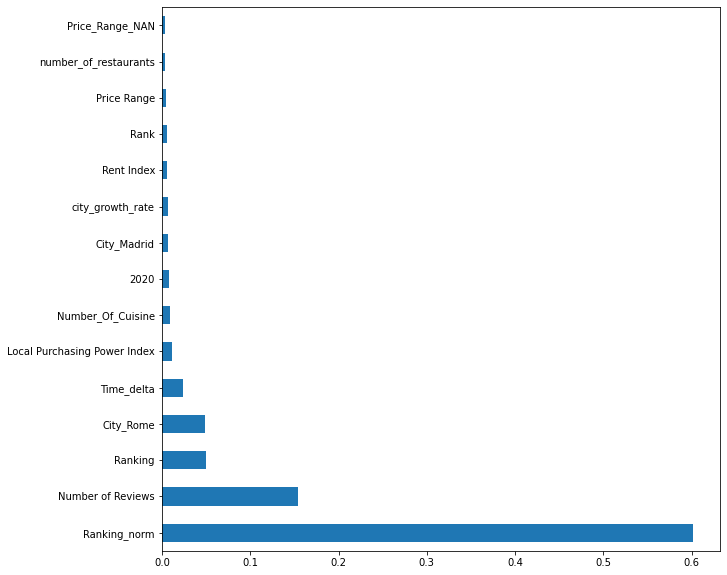

In [194]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [195]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Number_of_Reviews_isNAN,Cuisine_Style_NAN,Price_Range_NAN,chain,Rank,Rent Index,...,City_Munich,City_Oslo,City_Paris,City_Porto,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
9399,2131.0,1,83.0,0.0,0,0,0,0.0,266,32.44,...,0,0,0,0,0,0,0,0,0,0
3811,623.0,3,206.0,0.0,0,0,0,1.0,34,70.30,...,0,0,0,0,0,0,0,0,0,0
5089,523.0,2,71.0,0.0,0,0,0,1.0,48,27.34,...,0,0,0,0,0,0,0,0,0,0
7928,4940.0,2,30.0,0.0,0,0,0,1.0,26,47.60,...,0,0,1,0,0,0,0,0,0,0
6780,3636.0,2,0.0,0.0,1,1,1,1.0,310,29.92,...,0,0,0,0,0,0,0,0,0,0
8379,6338.0,1,21.0,0.0,0,0,0,0.0,34,70.30,...,0,0,0,0,0,0,0,0,0,0
258,1577.0,2,226.0,0.0,0,0,0,1.0,26,47.60,...,0,0,1,0,0,0,0,0,0,0
3622,916.0,2,37.0,0.0,0,0,0,1.0,55,40.18,...,0,0,0,0,0,0,1,0,0,0
7964,11187.0,2,14.0,0.0,0,0,1,1.0,26,47.60,...,0,0,1,0,0,0,0,0,0,0
5092,1439.0,2,9.0,0.0,0,0,1,1.0,120,35.25,...,0,0,0,0,0,0,0,0,0,0


In [196]:
test_data = test_data.drop(['Rating'], axis=1)

In [197]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [198]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


In [199]:
predict_submission

array([3.075, 4.245, 4.48 , ..., 3.04 , 4.5  , 4.18 ])

In [200]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.075
1,id_1,4.245
2,id_2,4.480
3,id_3,4.325
4,id_4,4.455
5,id_5,4.450
6,id_6,3.230
7,id_7,2.320
8,id_8,4.140
9,id_9,4.645


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
